# Problem Statement

> Yenapova Medical College wants to understand their patients' data from the gynaecology department. You have been given some infant and mother’s information who have given birth to their baby. Data Analyst have collected the data from hospital. With the help of data science and machine learning, you should understand the relationship between mother and their baby.

# Dataset Description:

- Mom weight: Weight of the mother
- Mom height : Height of the mother when she gave birth to baby
- Mom age : Age of mother
- Mom Religion : Different religions like hindu,muslim and christianity are present
- Mom gender : Gender is female
- Baby weight : Weight of baby after delivery

# Importing Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
dataset = pd.read_excel("birth.xlsx")
dataset.shape

(189, 6)

In [3]:
dataset.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


# Changing Gender column value with 1 (where 1 is female)

In [4]:
dataset['Gender'] = 1

# Value Counts

In [5]:
dataset['Gender'].value_counts()

1    189
Name: Gender, dtype: int64

In [6]:
dataset['Religion'].value_counts()

1    85
2    58
3    46
Name: Religion, dtype: int64

In [7]:
dataset['Mom_Age'].value_counts()

20    18
19    16
25    15
22    13
23    13
24    13
21    12
17    12
18    10
28     9
26     8
30     7
16     7
29     7
32     6
31     5
15     3
14     3
27     3
33     3
36     2
35     2
34     1
45     1
Name: Mom_Age, dtype: int64

In [8]:
dataset['Mom_height'].value_counts()

178    13
174    12
180    11
176    11
173     9
177     9
163     8
170     8
175     7
165     7
172     7
188     6
168     6
184     6
179     6
167     6
153     5
164     5
171     5
157     4
160     4
169     4
182     4
158     3
187     3
181     3
156     2
152     2
151     2
159     2
162     2
166     2
185     2
154     1
186     1
189     1
Name: Mom_height, dtype: int64

In [9]:
dataset['Mom_weight'].value_counts()

70    18
60    12
74    12
75    11
73    11
72    10
69     9
71     8
77     7
61     6
76     6
66     6
59     6
49     4
54     4
58     4
78     4
41     4
68     4
64     4
67     4
56     3
46     3
53     3
52     3
62     2
43     2
44     2
47     2
48     2
79     2
63     2
55     2
57     2
50     1
45     1
65     1
42     1
51     1
Name: Mom_weight, dtype: int64

# Describing Dataset

In [10]:
dataset.describe()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
count,189.000000,189.000000,189.000000,189.000000,189.0,189.000000
mean,65.089947,172.026455,23.238095,1.793651,1.0,2.936508
std,9.966826,8.978363,5.298678,0.808704,0.0,0.645921
min,41.000000,151.000000,14.000000,1.000000,1.0,1.500000
25%,59.000000,166.000000,19.000000,1.000000,1.0,2.440000
50%,69.000000,174.000000,23.000000,2.000000,1.0,2.980000
75%,73.000000,178.000000,26.000000,2.000000,1.0,3.440000
max,79.000000,189.000000,45.000000,3.000000,1.0,4.150000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom_weight    189 non-null    int64  
 1   Mom_height    189 non-null    int64  
 2   Mom_Age       189 non-null    int64  
 3   Religion      189 non-null    int64  
 4   Gender        189 non-null    int64  
 5   Birth_Weight  189 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 9.0 KB


# Visual Representation of Dataset (Verfying there is a relationship between  X and y)

Text(36.0, 0.5, "Child's Weight")

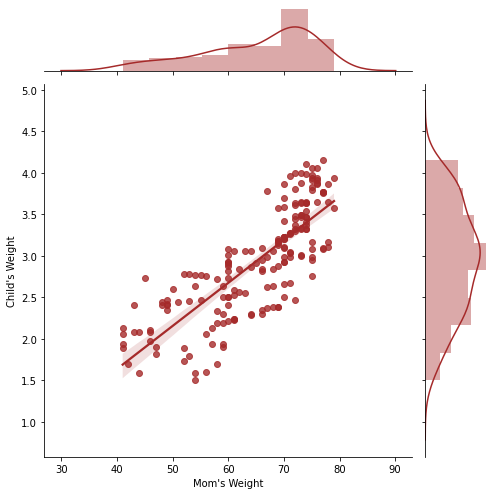

In [12]:
sns.jointplot(x='Mom_weight',y='Birth_Weight',data=dataset,kind='reg',color='brown',size=7);
plt.xlabel("Mom's Weight")
plt.ylabel("Child's Weight")

Text(36.0, 0.5, "Child's Weight")

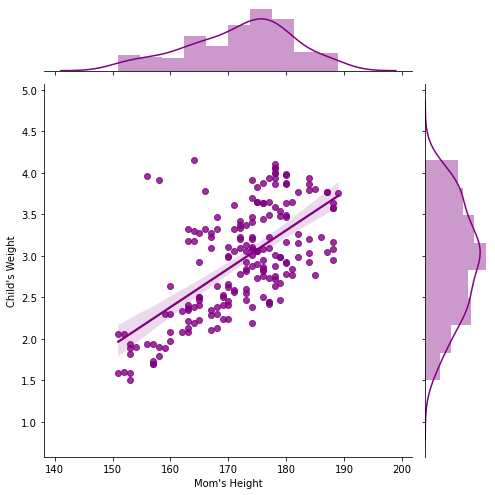

In [13]:
sns.jointplot(x='Mom_height',y='Birth_Weight',data=dataset,kind='reg',color='purple',size=7);
plt.xlabel("Mom's Height")
plt.ylabel("Child's Weight")

Text(36.0, 0.5, "Child's Weight")

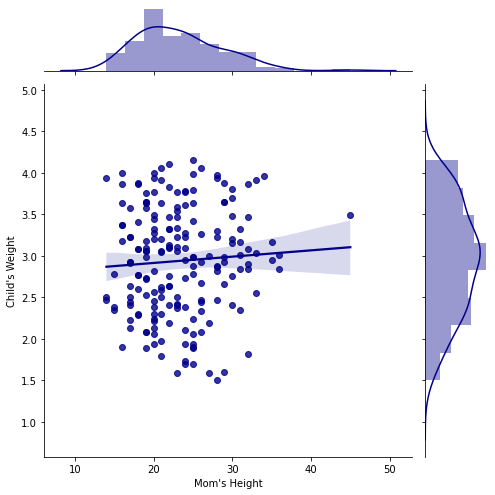

In [14]:
sns.jointplot(x='Mom_Age',y='Birth_Weight',data=dataset,kind='reg',color='darkblue',size=7);
plt.xlabel("Mom's Height")
plt.ylabel("Child's Weight")

In [15]:
X = dataset.iloc[:,:-2]
y = dataset['Birth_Weight']

# Showing X and y

In [16]:
X.head()

,Mom_weight,Mom_height,Mom_Age,Religion
0,41,152,25,1
1,42,157,25,3
2,44,153,23,2
3,45,177,19,2
4,46,160,19,2


In [17]:
y.head()

0    2.06
1    1.70
2    1.59
3    2.73
4    2.08
Name: Birth_Weight, dtype: float64

In [18]:
X.shape

(189, 4)

In [19]:
y.shape

(189,)

# Model 1 (Linear Regression)

# Train Test Spilit

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [21]:
y_train.head()

131    3.76
56     2.98
101    4.05
134    3.26
179    2.38
Name: Birth_Weight, dtype: float64

In [22]:
X_test.head()

,Mom_weight,Mom_height,Mom_Age,Religion
108,77,187,23,2
74,72,185,30,3
161,60,163,20,2
95,75,180,35,1
123,74,176,19,2


In [23]:
X_train.shape

(170, 4)

In [24]:
X_test.shape

(19, 4)

# Fiting X_train and y_train

In [25]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Comparing Actual and Predicted

In [26]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
108,3.77,3.782433
74,3.80,3.601751
161,2.21,2.548079
95,3.17,3.449017
123,3.63,3.417456
71,3.27,3.090956
18,2.75,2.637739
124,3.64,3.488875
143,2.08,1.802176
7,1.90,1.804454


# Visual representation of Actual and Predicted values

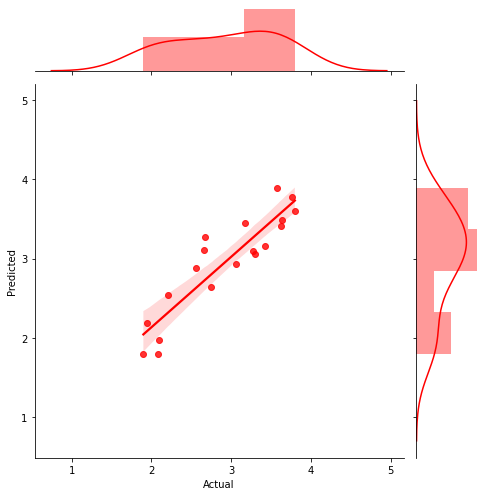

In [27]:
sns.jointplot(x='Actual',y='Predicted',data=df,kind='reg',color='red',size=7);

#### Linear Regression Metric Verification

In [28]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23982227324261834
Mean Squared Error: 0.07499595321340292
Root Mean Squared Error: 0.27385389026523416


In [29]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.8152420776029345


In [30]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.7536561034705794


# Model 2 (Random Forest Alogithm model on Supervised Learning)

In [31]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=50, random_state=0)

In [32]:
y_pred = regressor.predict(X_test)
rf = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
rf

,Actual,Predicted
108,3.77,3.6858
74,3.80,3.4760
161,2.21,2.3808
95,3.17,3.4524
123,3.63,3.4070
71,3.27,3.2238
18,2.75,2.6788
124,3.64,3.6824
143,2.08,2.2546
7,1.90,1.7592


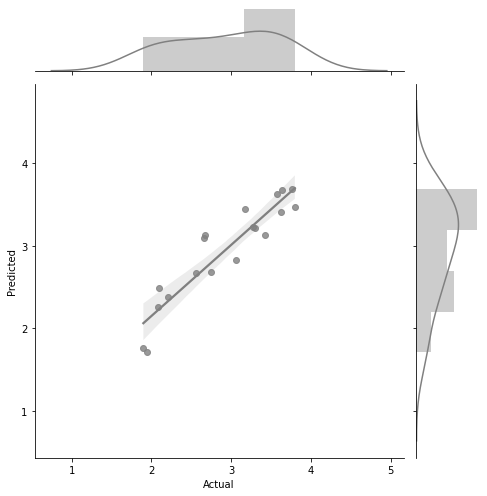

In [33]:
sns.jointplot(x='Actual',y='Predicted',data=rf,kind='reg',color='grey',size=7);

In [34]:
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20239999999999986
Mean Squared Error: 0.05737502736842087
Root Mean Squared Error: 0.23953084846929606


# Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cv = cross_val_score(reg, X, y, cv = 2, scoring = 'neg_root_mean_squared_error')

In [36]:
Root_Mean_Squared_Error = -(cv)

In [37]:
print(Root_Mean_Squared_Error)

[0.34389196 0.36992735]


- For the above 2 models. Model 2 (Randam forest Alogithm) is taken as best model because the root mean squared error is less than Model 1 (Linear Regression)

# End of Model Preparation